<a href="https://colab.research.google.com/github/rahelmichiko/pemodelan-matematika/blob/main/Tugas%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# *EPIDEMI SIR*

In [ ]:
# Populasi total
# N = S+I+R
N = 500

#Nilai awal individu yang terinfeksi dan yang pulih
I0, R0 = 1, 0

#S0 yang retan terinfeksi
S0 = N - I0 - R0

#Laju infeksi (beta) dan laju rata-rata sembuh (gamma) dalam satuan/hari
beta, gamma = 0.4, 1./10

#Harapan hidup
mu = 1/(30*365)

# Grid hari (dalam hari)
t = np.linspace (0, 365, 365)

In [ ]:
# Model Epidemi SIR
def deriv(y, t, N, beta, gamma, mu):
  S, I, R = y
  dSdt = mu * N - mu * S - beta * S * I / N
  dIdt = beta * S * I / N - mu * I - gamma * I
  dRdt = gamma * I - mu * R
  return dSdt, dIdt, dRdt

# vektor nilai awal
y0 = S0, I0, R0

# cari solusi dengan integral terhadap waktu
sol = odeint(deriv, y0, t, args= (N, beta, gamma, mu))

In [ ]:
sol

array([[ 4.99000000e+02,  1.00000000e+00,  0.00000000e+00],
       [ 4.98533552e+02,  1.34952492e+00,  1.16923358e-01],
       [ 4.97904907e+02,  1.82042354e+00,  2.74669223e-01],
       ...,
       [ 2.39421763e+01, -8.81662835e-10,  4.76057824e+02],
       [ 2.39857693e+01, -8.25033659e-10,  4.76014231e+02],
       [ 2.40293584e+01, -7.40271514e-10,  4.75970642e+02]])

In [ ]:
S, I, R = sol.T

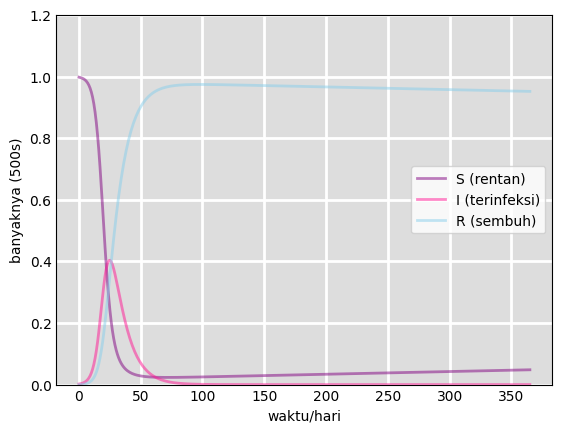

In [ ]:
# Plot data
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/N, 'purple', alpha=0.5, lw=2, label='S (rentan)')
ax.plot(t, I/N, 'deeppink', alpha=0.5, lw=2, label='I (terinfeksi)')
ax.plot(t, R/N, 'skyblue', alpha=0.5, lw=2, label='R (sembuh)')

ax.set_xlabel('waktu/hari')
ax.set_ylabel('banyaknya (500s)')

ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)

ax.grid(which='major', c='w', lw=2, ls='-')

legend = ax.legend()
plt.show()

# *SIR DENGAN VAKSINASI*

In [ ]:
# Populasi total
# N = S+I+R
N = 1000

#Nilai awal individu yang terinfeksi dan yang pulih
I0, R0 = 1, 0

#S0 yang retan terinfeksi
S0 = N - I0 - R0

# Parameter
beta, gamma = 0.2, 1./10
mu = 1/(60*365)

#Jumlah Populasi yang Divaksin
alpha = 0.5

# Grid hari (dalam hari)
t = np.linspace (0, 365, 365)

In [ ]:
# Model SIR dengan Vaksinasi
def deriv(y, t, N, beta, gamma, mu, alpha):
  S, I, R = y
  dSdt = mu * (1 - alpha) * N - mu * S - beta * S * I / N
  dIdt = beta * S * I / N - mu * I - gamma * I
  dRdt = gamma * I - mu * R + mu * alpha * N
  return dSdt, dIdt, dRdt

# vektor nilai awal
y0 = S0, I0, R0

# cari solusi dengan integral terhadap waktu
sol = odeint(deriv, y0, t, args= (N, beta, gamma, mu, alpha))

In [ ]:
sol

array([[9.99000000e+02, 1.00000000e+00, 0.00000000e+00],
       [9.98766472e+02, 1.10517679e+00, 1.28351413e-01],
       [9.98510858e+02, 1.22135589e+00, 2.67785849e-01],
       ...,
       [2.07000494e+02, 1.13926606e-05, 7.92999495e+02],
       [2.07013909e+02, 1.07420695e-05, 7.92986080e+02],
       [2.07027323e+02, 1.01286029e-05, 7.92972667e+02]])

In [ ]:
S, I, R = sol.T

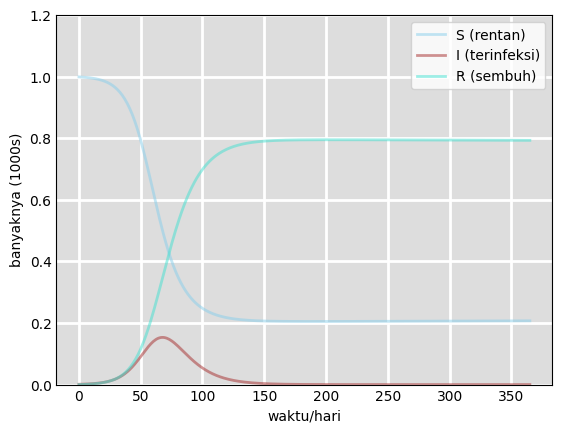

In [ ]:
# Plot data
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/N, 'skyblue', alpha=0.5, lw=2, label='S (rentan)')
ax.plot(t, I/N, 'brown', alpha=0.5, lw=2, label='I (terinfeksi)')
ax.plot(t, R/N, 'turquoise', alpha=0.5, lw=2, label='R (sembuh)')

ax.set_xlabel('waktu/hari')
ax.set_ylabel('banyaknya (1000s)')

ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)

ax.grid(which='major', c='w', lw=2, ls='-')

legend = ax.legend()
plt.show()

# *SEIR*

In [ ]:
# Populasi total
# N = S+E+I+R
N = 500

#Nilai awal
I0, R0 = 1, 0
E0 = 0
S0 = N - E0 - I0 - R0

# Parameter
beta, gamma = 0.4, 1./10
mu = 1/(70*365)
alpha = 0.5
sigma = 1/5
eps = 0.1


# Grid hari (dalam hari)
t = np.linspace (0, 365, 365)

In [ ]:
# Model SIR dengan Vaksinasi
def deriv(y, t, N, beta, gamma, mu, alpha, sigma, eps):
  S, E, I, R = y
  dSdt = mu * N - mu * S - beta * S * I / N - eps * S * E / N
  dEdt = eps * S * E / N - (1-alpha)*sigma * I / N - mu * E
  dIdt = (1-alpha)*sigma * I / N - mu * I - gamma * I + beta * S * I / N
  dRdt = gamma * I - mu * R
  return dSdt, dEdt, dIdt, dRdt

# vektor nilai awal
y0 = S0, E0, I0, R0

# cari solusi dengan integral terhadap waktu
sol = odeint(deriv, y0, t, args= (N, beta, gamma, mu, alpha, sigma, eps))

In [ ]:
sol

array([[ 4.99000000e+02,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 4.98533437e+02, -2.45365414e-04,  1.34986618e+00,
         1.16941786e-01],
       [ 4.97904500e+02, -6.02259623e-04,  1.82134405e+00,
         2.74758519e-01],
       ...,
       [ 1.75849647e+01, -2.92483529e+00, -5.60088896e-10,
         4.85339871e+02],
       [ 1.76142387e+01, -2.93506181e+00, -4.14452147e-10,
         4.85320823e+02],
       [ 1.76435650e+01, -2.94534139e+00, -2.63095523e-10,
         4.85301776e+02]])

In [ ]:
S, E, I, R = sol.T

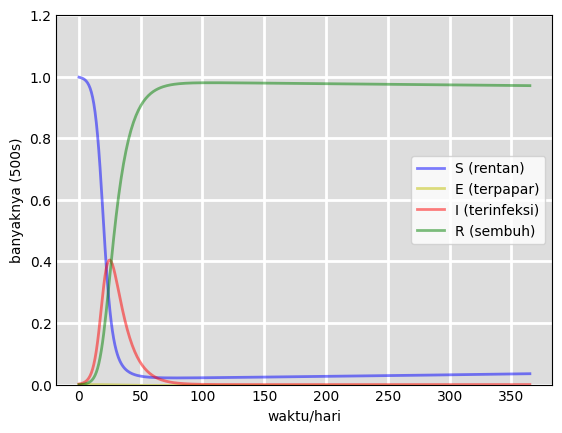

In [ ]:
# Plot data
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S (rentan)')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='E (terpapar)')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I (terinfeksi)')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R (sembuh)')

ax.set_xlabel('waktu/hari')
ax.set_ylabel('banyaknya (500s)')

ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)

ax.grid(which='major', c='w', lw=2, ls='-')

legend = ax.legend()
plt.show()